In [1]:
"""
COSC 525 - Deep Learning
Project #3: Building Networks with Tensorflow and Keras
Contributors: Anna-Maria Nau and Christoph Metzner
Date: 03/10/20
"""
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
# Import other libraries
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [3]:
# Import fashion-mnist dataset from
# https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles
# Downloads the data, will take some time so make yourself some tea!


from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


In [4]:
max_val = x_train.max()
print("Maximal value: ", max_val)
min_val = x_train.min()
print("Minimum value: ", min_val)

Maximal value:  255
Minimum value:  0


In [5]:
def normalization(matrix, max_val, min_val):
    new_matrix = np.array([((image - min_val)/(max_val-min_val)) for image in matrix])
    return new_matrix

In [6]:
# Normalize training (x_train) and testing (x_test) datasets based on maximal and minimal values of the training dataset
x_train_scaled = normalization(x_train, max_val, min_val)
x_test_scaled = normalization(x_test, max_val, min_val)

In [7]:
# Show normalized image matrix and original matrix
print(x_train_scaled[10])
print(x_train[10])
print(x_train.shape)
print(x_train_scale.shape)

[[0.         0.         0.         0.         0.         0.
  0.         0.04313725 0.55686275 0.78431373 0.41568627 0.
  0.         0.         0.         0.         0.         0.
  0.33333333 0.7254902  0.43921569 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.59607843 0.83921569 0.85098039 0.76078431 0.9254902  0.84705882
  0.73333333 0.58431373 0.52941176 0.6        0.82745098 0.85098039
  0.90588235 0.80392157 0.85098039 0.7372549  0.13333333 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.25882353
  0.7254902  0.65098039 0.70588235 0.70980392 0.74509804 0.82745098
  0.86666667 0.77254902 0.57254902 0.77647059 0.80784314 0.74901961
  0.65882353 0.74509804 0.6745098  0.7372549  0.68627451 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.52941176
  0.6        0.62745098 0.68627

NameError: name 'x_train_scale' is not defined

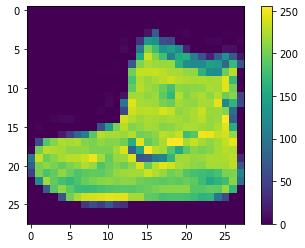

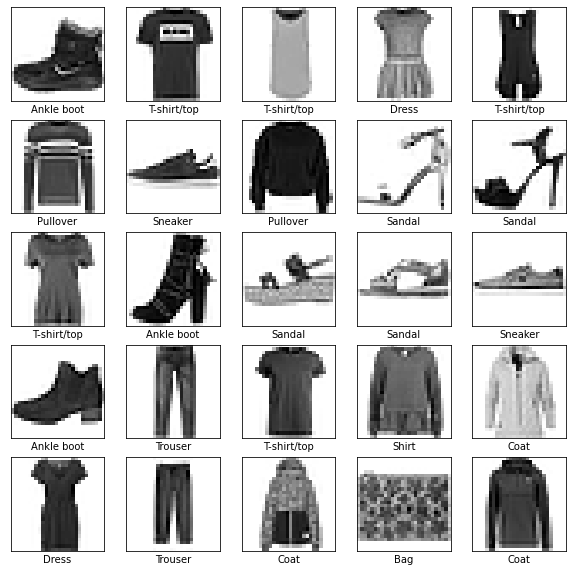

In [8]:
# from https://www.tensorflow.org/tutorials/keras/classification
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot first image of the training dataset
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()
##########

# Plot the first images plus their labels 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [9]:
# from https://stackoverflow.com/questions/43178668/record-the-computation-time-for-each-epoch-in-keras-during-model-fit
# Class which enables to store the execution time per epoch
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

# Task 1: Fully Connected Neural Network

In [10]:
FC_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name="FC_Input_Layer"),
    keras.layers.Dense(784, activation='tanh', name="FC_Hidden_Layer_1"),
    keras.layers.Dense(512, activation='sigmoid',name="FC_Hidden_Layer_2"),
    keras.layers.Dense(100, activation='relu', name="FC_Hidden_Layer_3"),
    keras.layers.Dense(10, activation='softmax', name="FC_Output_Layer")],
    name='Fully_Connected_NN')

In [11]:
print(FC_model.summary())

Model: "Fully_Connected_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FC_Input_Layer (Flatten)     (None, 784)               0         
_________________________________________________________________
FC_Hidden_Layer_1 (Dense)    (None, 784)               615440    
_________________________________________________________________
FC_Hidden_Layer_2 (Dense)    (None, 512)               401920    
_________________________________________________________________
FC_Hidden_Layer_3 (Dense)    (None, 100)               51300     
_________________________________________________________________
FC_Output_Layer (Dense)      (None, 10)                1010      
Total params: 1,069,670
Trainable params: 1,069,670
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
# Compile the model
FC_model.compile(optimizer='sgd',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
time_callback_train = TimeHistory()
time_callback_test = TimeHistory()

In [13]:
# Fit the model and get time
history = FC_model.fit(x_train_scaled, y_train, epochs=50, batch_size=200, callbacks=[time_callback_train])
times_train = time_callback_train.times
print()
print("Reported times per epoch: \n ", times_train)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 116us/sample - loss: 1.7611 - accuracy: 0.5750
Epoch 2/50
60000/60000 [==============================] - 6s 101us/sample - loss: 1.0564 - accuracy: 0.7175
Epoch 3/50
60000/60000 [==============================] - 6s 102us/sample - loss: 0.8140 - accuracy: 0.7427
Epoch 4/50
60000/60000 [==============================] - 6s 93us/sample - loss: 0.7115 - accuracy: 0.7579
Epoch 5/50
60000/60000 [==============================] - 6s 103us/sample - loss: 0.6554 - accuracy: 0.7695
Epoch 6/50
60000/60000 [==============================] - 7s 116us/sample - loss: 0.6187 - accuracy: 0.7801
Epoch 7/50
60000/60000 [==============================] - 7s 117us/sample - loss: 0.5908 - accuracy: 0.7891
Epoch 8/50
60000/60000 [==============================] - 7s 114us/sample - loss: 0.5685 - accuracy: 0.7978
Epoch 9/50
60000/60000 [==============================] - 6s 104us/sample - loss: 0.5499 - accuracy: 0.8037 - loss

In [15]:
# Evaluate the model by using the test dataset
test_start_time = time.time()
test_loss, test_acc = FC_model.evaluate(x_test_scaled, y_test, batch_size=200, verbose=2, callbacks=[time_callback_test])
test_end_time = time.time() - test_start_time
print(test_end_time)

10000/1 - 0s - loss: 0.4152 - accuracy: 0.8465
0.4877345561981201


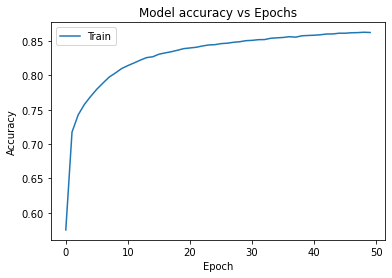

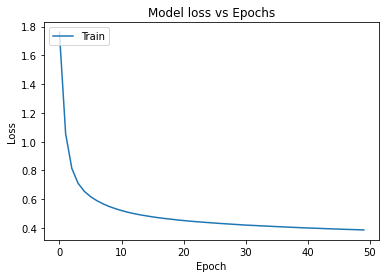

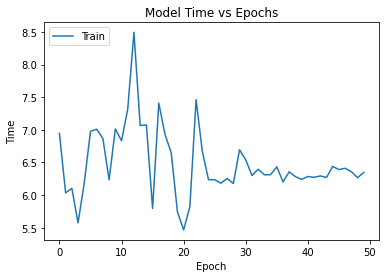

In [16]:
import matplotlib.pyplot as plt

# Plot training accuracy values vs epochs
plt.plot(history.history['accuracy'])
plt.title('Model accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training loss values vs epochs
plt.plot(history.history['loss'])
plt.title('Model loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training time vs epochs
plt.plot(range(0,len(times_train)), times_train)
plt.title('Model Time vs Epochs')
plt.ylabel('Time')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [17]:
def conf_matrix(model, x_test, y_test):
    # Generate prediction output from model using scaled testing dataset
    # Using keras predict_classes
    predictions = model.predict_classes(x_test, verbose=2)

    # Creating the confusion matrix using sklearn library
    conf_matrix = sklearn.confusion_matrix(y_test, predictions)
    # Changing confusing matrix output using pandas library
    conf_matrix = pd.DataFrame(conf_matrix)
    conf_matrix
    # Changing index / columns names to class names of output
    conf_matrix.columns = class_names
    conf_matrix.index = class_names
    display(conf_matrix)
    return conf_matrix

In [20]:
# Generate prediction output from model using scaled testing dataset
# Using keras predict_classes
# predictions = FC_model.predict_classes(x_test_scaled, verbose=2)

# Creating the confusion matrix using sklearn library
conf_matrix = confusion_matrix(y_test, predictions)
# Changing confusing matrix output using pandas library
conf_matrix = pd.DataFrame(conf_matrix)
conf_matrix
# Changing index / columns names to class names of output
conf_matrix.columns = class_names
conf_matrix.index = class_names
display(conf_matrix)

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,803,1,14,57,5,1,105,0,13,1
Trouser,1,953,7,29,4,0,5,0,1,0
Pullover,16,4,751,13,134,1,75,0,6,0
Dress,22,10,14,879,36,1,34,0,4,0
Coat,0,0,97,35,789,1,72,0,6,0
Sandal,0,0,0,1,0,899,0,59,5,36
Shirt,132,1,115,45,103,0,577,0,27,0
Sneaker,0,0,0,0,0,30,0,935,0,35
Bag,3,1,12,11,3,3,19,5,943,0
Ankle boot,0,0,0,0,0,12,0,51,1,936


# Task 2: Small Convolutional Neural Network

In [22]:
Small_CNN_model = keras.Sequential([
    layers.Conv2D(filters=40, kernel_size=5, strides=1, padding='valid', activation='relu',input_shape=(28,28))
    layers.MaxPooling2D(pool_size=2, strides=1, padding='valid'),
    layers.Dense(100, activation='relu', name="FC_Hidden_Layer_3"),
    layers.Dense(10, activation='softmax', name="FC_Output_Layer")],
    name='Fully_Connected_NN')

SyntaxError: invalid syntax (<ipython-input-22-824c6e1638a2>, line 3)